In [2]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/home/qyli/oPDF2')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [6]:
G3X_data = np.loadtxt('/home/qyli/oPDFnew/data/cluster/G3X_Mass_snap_128-center-cluster.txt')

In [3]:
fileCM = '../proxy/cluster/G3X-CM-masscomplete-ALL.txt'
filefit = '../proxy/cluster/GXsub_DM_fitmc_rcin200_100000_TMP.txt'
dataCM = np.loadtxt(fileCM)
datafit = np.loadtxt(filefit)
import oPDFplus as opd
mmtrue = datafit[:,0] / dataCM[:,2] * 1e15
cctrue = datafit[:,1] / dataCM[:,6]
loc = opd.sigma3sel(np.log10(mmtrue),np.log10(cctrue))

318
312
311
310
310


In [9]:
np.min(dataCM[loc,2])/1e14,np.min(G3X_data[loc,2])/1e14

(5.21599, 5.21599)

In [6]:
maind = np.loadtxt('../proxy/GadgetX_DS_main')
maind = maind[loc,1:]

In [34]:
def sigplot(loc0,lin):
    m_m0 = np.log10(mx[loc0])
    c_c0 = np.log10(cy[loc0])
    covmc = np.cov(m_m0,c_c0)
    print("cc is ",covmc[0,1] / covmc[0,0]**0.5  / covmc[1,1]**0.5)
    xs,ys,zs,siglevel = opd.sigma2dis(m_m0,c_c0,prisig = False)
    plt.contour(np.log10(xs),np.log10(ys),zs,levels = siglevel,linestyles = [lin],colors = 'k')
    
def bootstrap(phy):
    import random
    npp = phy.shape[0]
    Nboot = 100
    bootdata = np.zeros(Nboot)
    for k in range(Nboot):
        Npploc = np.array(random.choices(range(0,npp),k=npp), dtype = np.int64)
        bootdata[k] = np.mean(phy[Npploc])
    err = np.std(bootdata)
    return err

def plot_setting():
    plt.tick_params(top = 'on', right = 'on', which='both', direction = 'in', labelsize = 11)
    bwith = 1.2 #边框宽度设置为2
    ax = plt.gca()#获取边框
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
HalfMratio = np.loadtxt('../proxy/Half-mass-radius_ratio')[loc]
eta = maind[:,0]
nbin = 8
xx0 = 0.8
xx1 = 2.0
xbin = np.linspace(0.6,2.2,nbin + 1)
xx = (xbin[:-1] + xbin[1:]) / 2

mx = mmtrue[loc]
cy = cctrue[loc]

Mbias = np.zeros(nbin)
Cbias = np.zeros(nbin)
Merr = np.zeros(nbin)
Cerr = np.zeros(nbin)
b12 = np.zeros(nbin)
toterr = np.zeros(nbin)
for i in range(nbin):
    idx = np.where((eta >= xbin[i]) & (eta < xbin[i+1]))[0]
    Mbias[i] = np.mean(np.log10(mx[idx]))
    Cbias[i] = np.mean(np.log10(cy[idx]))
    Merr[i] = np.std(np.log10(mx[idx]))
    Cerr[i] = np.std(np.log10(cy[idx]))
    b12[i] = np.mean(HalfMratio[idx])
    print(xbin[i],xbin[i+1],idx.shape[0])
#     Merr[i] = bootstrap(np.log10(mx[idx]))

# idx0 = np.where(eta < xx0)[0]
# Mbias = np.append(np.mean(np.log10(mx[idx0])), Mbias)
# Cbias = np.append(np.mean(np.log10(cy[idx0])), Cbias)
# Merr = np.append(np.std(np.log10(mx[idx0])), Merr)
# Cerr = np.append(np.std(np.log10(cy[idx0])), Cerr)
# xx = np.append(np.mean(eta[idx0]),xx)
# print(idx0.shape)

# idx1 = np.where(eta > xx1)[0]
# Mbias = np.append(Mbias,np.mean(np.log10(mx[idx1])))
# Cbias = np.append(Cbias, np.mean(np.log10(cy[idx1])))
# Merr = np.append(Merr, np.std(np.log10(mx[idx1])))
# Cerr = np.append(Cerr, np.std(np.log10(cy[idx1])))
# xx = np.append(xx,np.mean(eta[idx1]))
# print(idx1.shape)

b_Mc = np.sqrt(Mbias**2+Cbias**2)
toterr = np.sqrt(Merr**2+Cerr**2)


0.6 0.8 2
0.8 1.0 35
1.0 1.2000000000000002 196
1.2000000000000002 1.4 50
1.4 1.6 14
1.6 1.8000000000000003 5
1.8000000000000003 2.0 4
2.0 2.2 2


<IPython.core.display.Javascript object>


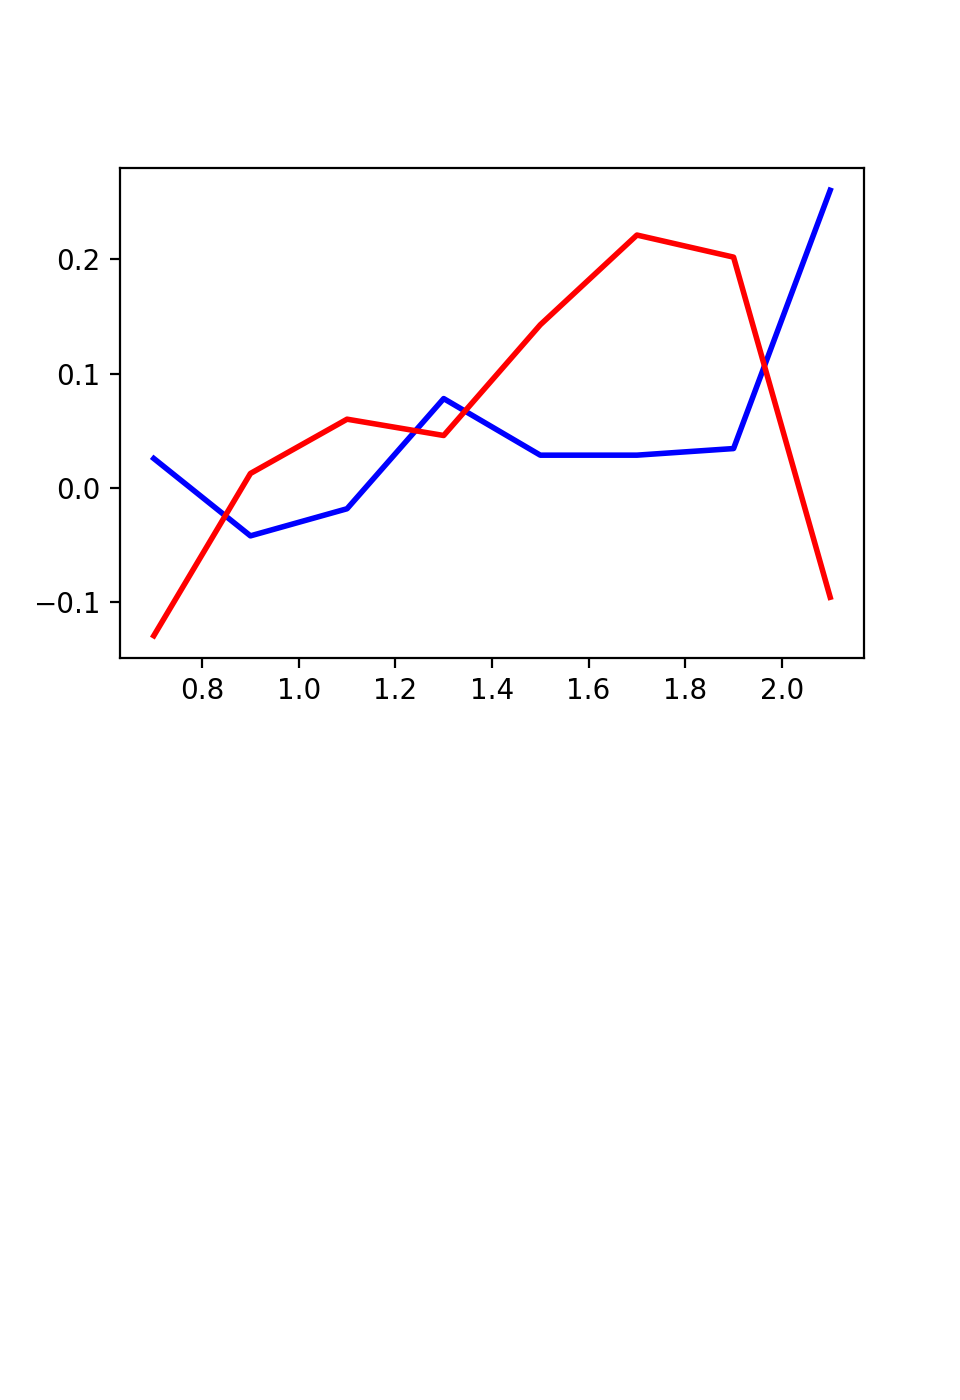

ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

In [35]:
plt.figure(figsize = (4.8,7))

plt.subplot(211)
plt.plot(xx, Mbias, lw = 2, c = 'b', label = r'$b_M$')
plt.plot(xx, Cbias, lw = 2, c = 'r', label = r'$b_c$')
plt.plot(xx, b_tot, lw = 2, c = 'k',label = r'$b_{\rm tot}$')
plot_setting()
plt.legend()
plt.ylabel('b', fontsize = 14)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

plt.subplot(212)
plt.plot(xx, Merr, lw = 2, c = 'b', ls = '--', label = r'$\sigma_M$')
plt.plot(xx, Cerr, lw = 2, c = 'r', ls = '--', label = r'$\sigma_c$')
plt.plot(xx, err_tot, lw = 2, c = 'k', ls = '--', label = r'$\sigma_{\rm tot}$')

plt.legend(ncol = 1)
plt.xlabel(r'$\eta$', fontsize = 14)
plt.ylabel('$\sigma$', fontsize = 14)
plot_setting()

plt.tight_layout()

plt.savefig('./figs/bias.pdf')

In [14]:
HalfMratio = np.loadtxt('../proxy/Half-mass-radius_ratio')[loc]

<IPython.core.display.Javascript object>


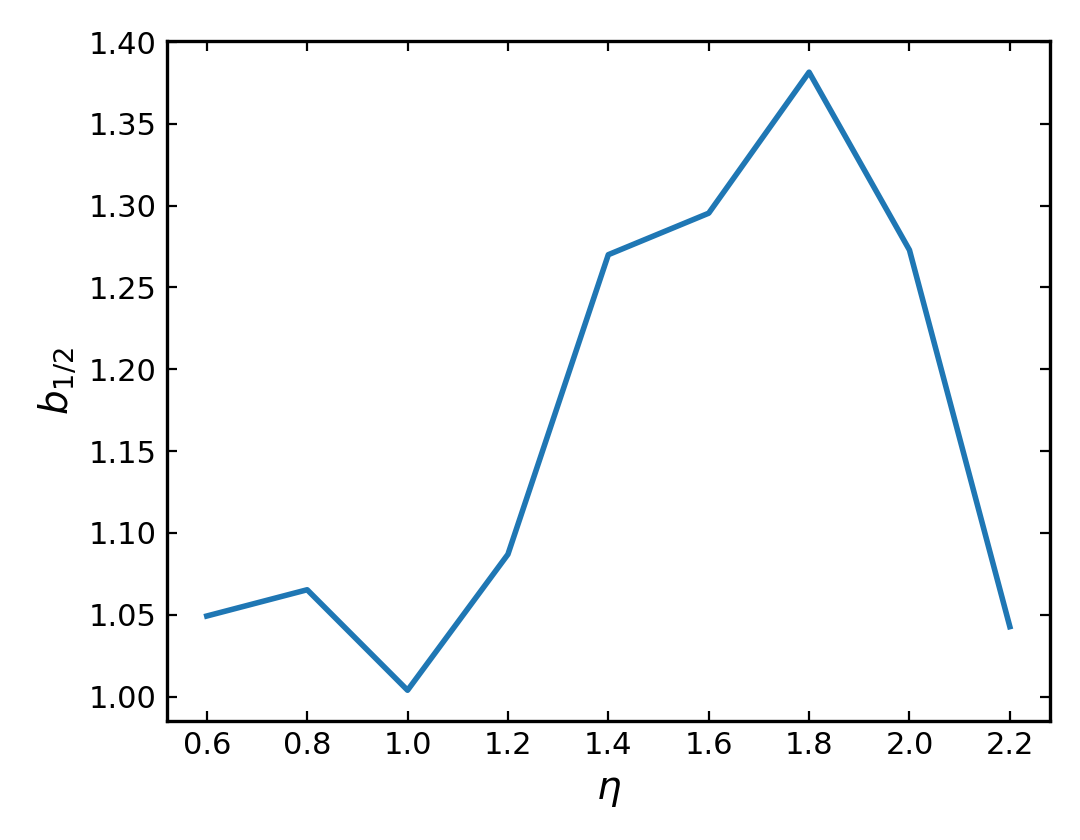

In [17]:
def bootstrap(phy):
    import random
    npp = phy.shape[0]
    Nboot = 100
    bootdata = np.zeros(Nboot)
    for k in range(Nboot):
        Npploc = np.array(random.choices(range(0,npp),k=npp), dtype = np.int64)
        bootdata[k] = np.mean(phy[Npploc])
    err = np.std(bootdata)
    return err
    
    
eta = maind[:,0]
HalfMratio = np.loadtxt('../proxy/Half-mass-radius_ratio')[loc]
nbin = 10
xbin = np.linspace(0.5,2.5,nbin + 1)
xx = (xbin[:-1] + xbin[1:]) / 2

mx = mmtrue[loc]
cy = cctrue[loc]

b12 = np.zeros(nbin)
for i in range(nbin):
    idx = np.where((eta >= xbin[i]) & (eta < xbin[i+1]))[0]
    b12[i] = np.mean(HalfMratio[idx])

plt.figure(figsize = (5.4,4.2))
plt.plot(xx, b12, lw = 2)

# plt.legend()
plt.xlabel(r'$\eta$', fontsize = 14)
plt.ylabel(r'$b_{1/2}$', fontsize = 14)

plt.tick_params(top = 'on', right = 'on', which='both', direction  = 'in',labelsize = 11)
bwith = 1.2 #边框宽度设置为2
ax = plt.gca()#获取边框
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
plt.tight_layout()

plt.savefig('./figs/b_eta.pdf')

In [1]:
target = np.loadtxt('../proxy/cluster/GXsub_DM_InL_rcin200_100000_TMP.txt')[loc]

NameError: name 'np' is not defined

In [16]:
fea = maind[:,1]
Nsam = 310
indices = np.arange(Nsam)
predt = np.zeros((Nsam))
time = np.zeros(Nsam)
oob = np.zeros(50)
for j in range(50):
    x_train,x_test,y_train,y_test,idx_train,idx_test = train_test_split(fea.reshape(310,1), HalfMratio, indices, test_size=0.3, random_state=j)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=j,  oob_score = True)
    forest.fit(x_train, y_train)
    oob[j] = forest.oob_score_
    predt[idx_test] += forest.predict(x_test)
    time[idx_test] += 1
predt = predt / time
print(np.mean(oob))

0.07381007310036175
